# TCR-DeepInsight Vignette

The emergence of single-cell immune profiling technology has led to the production of a large amount of data on single-cell gene expression (GEX) and T cell receptor (TCR), which has great potential for studying TCR biology and identifying effective TCRs. However, one of the major challenges is the lack of a reference atlas that provides easy access to these datasets. On the other hand, the use of TCR engineering in disease immunotherapy is rapidly advancing, and single-cell immune profiling data can be a valuable resource for identifying functional TCRs. Nevertheless, the lack of efficient computational tools to integrate and identify functional TCRs is a significant obstacle in this field.

The TCR-DeepInsight is a module that can perform **GEX** / **TCR** joint analysis.

<div class="alert alert-info">

**Note**
    
In Jupyter notebooks and lab, you can see the documentation for a python function by hitting ``SHIFT + TAB``. Hit it twice to expand the view.

</div>

In [8]:
import tcr_deep_insight as tdi

# Training new reference datasets

## Training GEX reference

The GEX data is stored in an .h5ad file, which contains **raw gene expression matrix** and meta informations including **study_name**, **sample_name**, and other annotations

In [8]:
gex_reference_adata = tdi.data.human_gex_reference_v1()

In [31]:
gex_reference_adata

AnnData object with n_obs × n_vars = 1017877 × 6000
    obs: 'IR_VJ_1_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VJ_1_v_call', 'IR_VJ_1_j_call', 'IR_VDJ_1_v_call', 'IR_VDJ_1_j_call', 'individual', 'cell_subtype', 'disease', 'disease_type', 'tcr', 'cell_type_1', 'cell_type_2', 'cell_type_3', 'study_name', 'sample_name', 'disease_type_1', 'disease_type_2'
    obsm: 'X_gex'

Here we use the reference GEX data from the paper, which contains 1,017,877 T cells from various studies and diseases

In [5]:
gex_reference_adata.obs

,IR_VJ_1_junction_aa,IR_VDJ_1_junction_aa,IR_VJ_1_v_call,IR_VJ_1_j_call,IR_VDJ_1_v_call,IR_VDJ_1_j_call,individual,cell_subtype,disease,disease_type,tcr,cell_type_1,cell_type_2,cell_type_3,study_name,sample_name,disease_type_1,disease_type_2
AAACCTGAGAAACCAT-Wen_2020-HC1,CAVRDNTNAGKSTF,CASSKHPDRYEQYF,TRAV1-2,TRAJ27,TRBV7-9,TRBJ2-7,HC1,NaN,Healthy,Healthy,CAVRDNTNAGKSTF=CASSKHPDRYEQYF=TRAV1-2=TRAJ27=T...,Naive CD4,Naive CD4,CD4,Wen_2020,HC1,Healthy,Healthy
AAACCTGAGAAACCAT-Yost_2019-su012_post_Tcell,CAALFSDGQKLLF,CASSLRQGAGSNQPQHF,TRAV39,TRAJ16,TRBV5-5,TRBJ1-5,su012,NaN,Basal cell carinoma tumor,Solid tumor,CAALFSDGQKLLF=CASSLRQGAGSNQPQHF=TRAV39=TRAJ16=...,CD4,CD4,CD4,Yost_2019,su012_post_Tcell,Solid tumor,Solid tumor
AAACCTGAGAAAGTGG-Gao_2020-HD5,CAASRGDNDMRF,CASSLRATDTQYF,TRAV13-1,TRAJ43,TRBV7-9,TRBJ2-3,HD5,NaN,Healthy,Healthy,CAASRGDNDMRF=CASSLRATDTQYF=TRAV13-1=TRAJ43=TRB...,CD4,CD4,CD4,Gao_2020,HD5,Healthy,Healthy
AAACCTGAGAAAGTGG-Gao_2020-UPN18_post,CAARVQGAQKLVF,CAWSVPRGLDEQYF,TRAV29DV5,TRAJ54,TRBV30,TRBJ2-7,UPN18,NaN,Large granular lymphocyte leukemia,T-LGLL,CAARVQGAQKLVF=CAWSVPRGLDEQYF=TRAV29DV5=TRAJ54=...,CD4,CD4,CD4,Gao_2020,UPN18_post,T-LGLL,T-LGLL
AAACCTGAGAAAGTGG-Krishna_2021-IpiNivo_Mixed_PBMC,CAASEGAGGFKTIF,CASRSDRGPNQPQHF,TRAV29DV5,TRAJ9,TRBV28,TRBJ1-5,IpiNivo_Mixed,NaN,Clear cell renal cell carcinoma,Solid tumor,CAASEGAGGFKTIF=CASRSDRGPNQPQHF=TRAV29DV5=TRAJ9...,CD4,CD4,CD4,Krishna_2021,IpiNivo_Mixed_PBMC,Solid tumor,Solid tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCATCTGCC-Simone_2021-AS02_SF,CLPVSGWEGGGNKLTF,CASSLDSPEQYF,TRAV26-1,TRAJ10,TRBV5-4,TRBJ2-7,AS02,GZMK+ Tex,Ankylosing spondylitis,Inflammation,CLPVSGWEGGGNKLTF=CASSLDSPEQYF=TRAV26-1=TRAJ10=...,CD8,CD8,CD8,Simone_2021,AS02_SF,Inflammation,Ankylosing spondylitis
TTTGTCAAGCGTAATA-Simone_2021-AS02_SF,CAMKGNAGNNRKLIW,CASSWTGVISGNTIYF,TRAV14DV4,TRAJ38,TRBV5-5,TRBJ1-3,AS02,Cycling T,Ankylosing spondylitis,Inflammation,CAMKGNAGNNRKLIW=CASSWTGVISGNTIYF=TRAV14DV4=TRA...,Cycling,Cycling,Undefined,Simone_2021,AS02_SF,Inflammation,Ankylosing spondylitis
TTTGTCAAGCTGTCTA-Simone_2021-AS02_SF,CAERDGYSTLTF,CSARARSYNEQFF,TRAV5,TRAJ11,TRBV20-1,TRBJ2-1,AS02,GZMK+ Tex,Ankylosing spondylitis,Inflammation,CAERDGYSTLTF=CSARARSYNEQFF=TRAV5=TRAJ11=TRBV20...,CD8,CD8,CD8,Simone_2021,AS02_SF,Inflammation,Ankylosing spondylitis
TTTGTCACATCACGTA-Simone_2021-AS02_SF,CVVRKPQDYNNARLMF,CASSLGGSYNEQFF,TRAV8-2,TRAJ31,TRBV27,TRBJ2-1,AS02,Cycling T,Ankylosing spondylitis,Inflammation,CVVRKPQDYNNARLMF=CASSLGGSYNEQFF=TRAV8-2=TRAJ31...,CD8,CD8,CD8,Simone_2021,AS02_SF,Inflammation,Ankylosing spondylitis


The VAEModel for GEX can be easily set up by the following code. The **sample_name** is set for the batch key for correcting batch effects.

In [7]:
vae_model = tdi.model.VAEModel(
    adata=gex_reference_adata, 
    batch_key="sample_name", 
    device='cuda:1'
)

Thu May  4 14:15:46 2023	Initializing dataset into memory
Thu May  4 14:15:47 2023	warning: the provided n_batch=0 does not match the number of batch in the adata.
Thu May  4 14:15:47 2023	setting n_batch to 437


Fitting the VAE model is ultra-fast with GPU support. We use only 16 epoch to train the VAE model as the number of cells is very large.

In [8]:
vae_model.fit(
    max_epoch=16,
    lr=1e-4,
    n_per_batch=256
)

Epoch 16: 100%|██████████████████████████████████████| 16/16 [14:44<00:00, 55.28s/it, loss=3.36e+05, reconst=3.33e+05, kldiv=2.96e+03]


In [ ]:
The latent embedding from the VAE model can be easily obtained and projected to 2D dimension.

In [9]:
gex_reference_adata.obsm["X_embedding"] = X_embedding = vae_model.get_latent_embedding()

In [10]:
import umap
gex_reference_adata.obsm["X_umap"] = tdi.tl.umap.UMAP(min_dist=0.5).fit_transform(X_embedding)

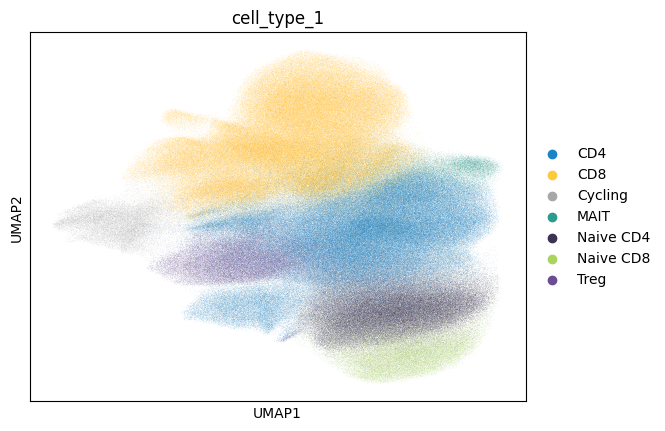

In [23]:
fig, ax = plt.subplots(figsize=(4, 4))
tdi.pl.umap(
    gex_reference_adata, 
    color='cell_type_1', 
    palette=tdi.pl.palette.reannotated_prediction_palette,
    ax=ax
)



## Training TCR reference

Similar to the GEX data, we store the TCR data in a .h5ad file, which contains the full-length 
TCR sequence. We aggregate the TCR sequence by **individual** to obtain unique clonotypes.

In [17]:
tcr_reference_adata = tdi.read_h5ad("./tcr_deep_insight/data/reference/human_tcr_reference_v1.h5ad")

In [4]:
tcr_reference_adata.obs

,TRAV,TRAJ,TRBV,TRBJ,CDR3a,CDR3b,individual,disease,disease_type,cell_subtype,tcr,disease_type_1,disease_type_2,CDR3a_mr,CDR3b_mr
CAAAAAGKSTF-CASSQGDSSYEQYF-TRAV12-2-TRAJ27-TRBV7-4-TRBJ2-7-IpiNivo_Resistant,TRAV12-2,TRAJ27,TRBV7-4,TRBJ2-7,CAAAAAGKSTF,CASSQGDSSYEQYF,IpiNivo_Resistant,Clear cell renal cell carcinoma,Solid tumor,CD8,CAAAAAGKSTF=CASSQGDSSYEQYF=TRAV12-2=TRAJ27=TRB...,Solid tumor,Solid tumor,AAA,QGDS
CAAAAAGNKLTF-CASSGDPIVGEQFF-TRAV13-1-TRAJ17-TRBV5-6-TRBJ2-1-PBMC_C_HD2,TRAV13-1,TRAJ17,TRBV5-6,TRBJ2-1,CAAAAAGNKLTF,CASSGDPIVGEQFF,PBMC_C_HD2,Healthy,COVID-19,CD4,CAAAAAGNKLTF=CASSGDPIVGEQFF=TRAV13-1=TRAJ17=TR...,Healthy,Healthy,A,GDPIVG
CAAAAAGNKLTF-CSAREQGWGEQFF-TRAV13-1-TRAJ17-TRBV20-1-TRBJ2-1-PBMC_P5,TRAV13-1,TRAJ17,TRBV20-1,TRBJ2-1,CAAAAAGNKLTF,CSAREQGWGEQFF,PBMC_P5,MIS-C,COVID-19,CD4,CAAAAAGNKLTF=CSAREQGWGEQFF=TRAV13-1=TRAJ17=TRB...,COVID-19,COVID-19,A,EQGWG
CAAAAAGRRALTF-CSARGGWGGITGELFF-TRAV12-2-TRAJ5-TRBV20-1-TRBJ2-2-IpiNivo_Complete,TRAV12-2,TRAJ5,TRBV20-1,TRBJ2-2,CAAAAAGRRALTF,CSARGGWGGITGELFF,IpiNivo_Complete,Clear cell renal cell carcinoma,Solid tumor,CD4,CAAAAAGRRALTF=CSARGGWGGITGELFF=TRAV12-2=TRAJ5=...,Solid tumor,Solid tumor,AAAA,GGWGGI
CAAAAARGSYIPTF-CASSLSDYGYTF-TRAV21-TRAJ6-TRBV5-6-TRBJ1-2-C-39,TRAV21,TRAJ6,TRBV5-6,TRBJ1-2,CAAAAARGSYIPTF,CASSLSDYGYTF,C-39,COVID-19,COVID-19,CD8,CAAAAARGSYIPTF=CASSLSDYGYTF=TRAV21=TRAJ6=TRBV5...,COVID-19,COVID-19,AAAAR,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CYVGGTSYGKLTF-CASSLEREIYGYTF-TRAV8-3-TRAJ52-TRBV5-4-TRBJ1-2-HD4,TRAV8-3,TRAJ52,TRBV5-4,TRBJ1-2,CYVGGTSYGKLTF,CASSLEREIYGYTF,HD4,Healthy,Healthy,CD4,CYVGGTSYGKLTF=CASSLEREIYGYTF=TRAV8-3=TRAJ52=TR...,Healthy,Healthy,,EREI
CYYDKVIF-CSARAIAGGPPETQYF-TRAV12-3-TRAJ50-TRBV20-1-TRBJ2-5-NPC_SC_1813,TRAV12-3,TRAJ50,TRBV20-1,TRBJ2-5,CYYDKVIF,CSARAIAGGPPETQYF,NPC_SC_1813,Nasopharyngeal carcinoma,Solid tumor,CD4,CYYDKVIF=CSARAIAGGPPETQYF=TRAV12-3=TRAJ50=TRBV...,Solid tumor,Solid tumor,Y,AIAGGPP
CYYPYKLSF-CASSIGGTEAFF-TRAV12-1-TRAJ20-TRBV19-TRBJ1-1-IpiNivo_Resistant,TRAV12-1,TRAJ20,TRBV19,TRBJ1-1,CYYPYKLSF,CASSIGGTEAFF,IpiNivo_Resistant,Clear cell renal cell carcinoma,Solid tumor,CD8,CYYPYKLSF=CASSIGGTEAFF=TRAV12-1=TRAJ20=TRBV19=...,Solid tumor,Solid tumor,YYP,GG
CYYSATGNQFYF-CASSPGGLVNEQFF-TRAV24-TRAJ49-TRBV27-TRBJ2-1-UPN10,TRAV24,TRAJ49,TRBV27,TRBJ2-1,CYYSATGNQFYF,CASSPGGLVNEQFF,UPN10,Large granular lymphocyte leukemia,T-LGLL,CD4,CYYSATGNQFYF=CASSPGGLVNEQFF=TRAV24=TRAJ49=TRBV...,T-LGLL,T-LGLL,YYSA,PGGLV


We implemented a tokenizer for the full-length TCR sequence.

In [4]:
tcr_tokenizer = tdi.model.TCRabTokenizer(
    tra_max_length=48, 
    trb_max_length=48,
    species='human' # or 'mouse'
)
tcr_dataset = tcr_tokenizer.to_dataset(
   ids=tcr_reference_adata.obs.index,
   alpha_v_genes=list(tcr_reference_adata.obs['TRAV']),
   alpha_j_genes=list(tcr_reference_adata.obs['TRAJ']),
   beta_v_genes=list(tcr_reference_adata.obs['TRBV']),
   beta_j_genes=list(tcr_reference_adata.obs['TRBJ']),
   alpha_chains=list(tcr_reference_adata.obs['CDR3a']),
   beta_chains=list(tcr_reference_adata.obs['CDR3b']),
)


If the dataset is for training, we can split the dataset into train and test set.

In [5]:
# Train Test Split
tcr_dataset = tcr_dataset['train'].train_test_split(0.05)

Parameter 'generator'=Generator(PCG64) of the transform datasets.arrow_dataset.Dataset.train_test_split couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


The dataset can be saved to disk

In [ ]:
tcr_dataset.save_to_disk("./tcr_deep_insight/data/datasets/human_tcr_v1")

In [3]:
import datasets
tcr_dataset = datasets.load_from_disk("./tcr_deep_insight/data/datasets/human_tcr_v1")

In [4]:
tcr_model = tdi.model.TCRabModel(
    tdi.model.config.get_human_config(),
    labels_number=1
).to("cuda:1")

tcr_collator = tdi.model.TCRabCollator(48, 48, mlm_probability=0.15)
tcr_model_optimizers = (torch.optim.AdamW(tcr_model.parameters(), lr=1e-4), None)
tcr_model_trainer = tdi.model.TCRabTrainer(
    tcr_model, 
    collator=tcr_collator, 
    train_dataset=tcr_dataset['train'], 
    test_dataset=tcr_dataset['test'], 
    optimizers=tcr_model_optimizers, 
    device='cuda:1'
)

In [7]:
tcr_model_trainer.fit(max_epoch=3, show_progress_bar=True)

  5%|██████████▊                                                                                                                                                                                                      | 3129/60362 [03:53<1:13:05, 13.05it/s, Loss=0.0457, Prediction=0]

In [ ]:
torch.save(tcr_model.state_dict(), '/path/to/saved/checkpoints')

In [5]:
tcr_model.load_state_dict(torch.load("./tcr_deep_insight/data/pretrained_weights/human_bert_tcr_768_v1.ckpt"))

<All keys matched successfully>

In [6]:
tcr_model_trainer.attach_train_dataset(tcr_dataset['train'])
tcr_model_trainer.attach_test_dataset(tcr_dataset['test'])

In [ ]:
all_train_result, all_test_result = tcr_model_trainer.evaluate(n_per_batch=64, show_progress=True)

In [20]:
from collections import Counter

def FLATTEN(x): 
    return [i for s in x for i in s]

print("==== Train ====")
print('masked amino acids prediction {:.3f}'.format(Counter(FLATTEN(all_train_result['aa']))[True] / len(FLATTEN(all_train_result['aa']))))
print('masked TRAV prediction {:.3f}'.format(Counter(FLATTEN(all_train_result['av']))[True] / len(FLATTEN(all_train_result['av']))))
print('masked TRBV prediction {:.3f}'.format(Counter(FLATTEN(all_train_result['bv']))[True] / len(FLATTEN(all_train_result['bv']))))
print("==== Test ====")
print('masked amino acids prediction {:.3f}'.format(Counter(FLATTEN(all_test_result['aa']))[True] / len(FLATTEN(all_test_result['aa']))))
print('masked TRAV prediction {:.3f}'.format(Counter(FLATTEN(all_test_result['av']))[True] / len(FLATTEN(all_test_result['av']))))
print('masked TRBV prediction {:.3f}'.format(Counter(FLATTEN(all_test_result['bv']))[True] / len(FLATTEN(all_test_result['bv']))))

==== Train ====
masked amino acids prediction 0.781
masked TRAV prediction 0.778
masked TRBV prediction 0.671
==== Test ====
masked amino acids prediction 0.784
masked TRAV prediction 0.780
masked TRBV prediction 0.669


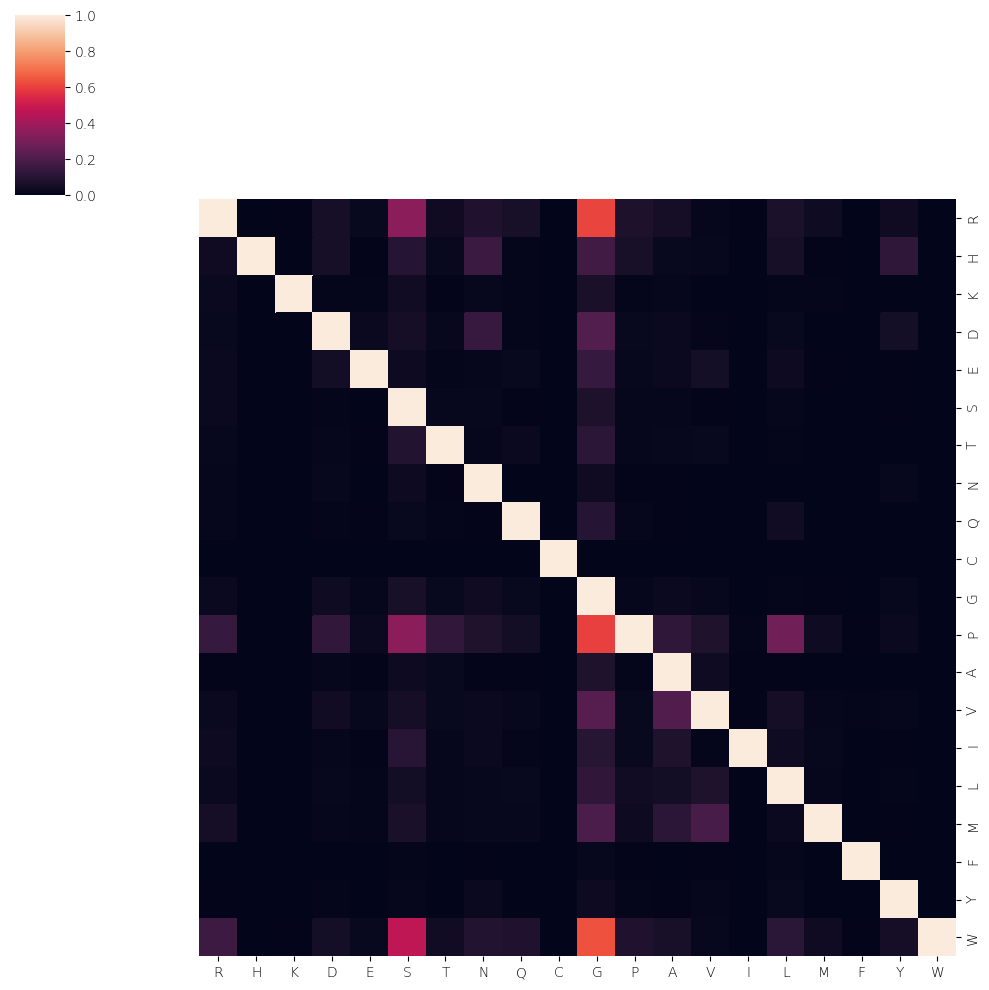

In [46]:
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

labels = np.unique(FLATTEN(all_train_result['aa_gt']) + FLATTEN(all_train_result['aa_pred']))
cm = sklearn.metrics.confusion_matrix(
    FLATTEN(all_train_result['aa_gt']), 
    FLATTEN(all_train_result['aa_pred']), 
    labels=labels
)
cm = cm[:20,:][:,:20]
cm = pd.DataFrame(
    cm, 
    index=list(map(lambda x: _AMINO_ACIDS_INDEX_REVERSE[x], labels[:20])),
    columns=list(map(lambda x: _AMINO_ACIDS_INDEX_REVERSE[x], labels[:20]))
)
from tcr_deep_insight.utils._amino_acids import _AMINO_ACIDS_INDEX_REVERSE
sns.clustermap(cm, row_cluster=False, col_cluster=False, standard_scale='var')
plt.show()

## Cluster TCRs in reference datasets

In [84]:
tdi.pp.update_anndata(gex_reference_adata)
tcr_reference_adata = tdi.pp.unique_tcr_by_individual(gex_reference_adata, label_key='cell_type_1')

Fri May  5 21:11:40 2023	TCRDeepInsight: initializing dataset
Fri May  5 21:11:40 2023	TCRDeepInsight: adding 'tcr' to adata.obs


In [85]:
tdi.tl.get_pretrained_tcr_embedding(
    tcr_adata=tcr_reference_adata,
    bert_config=tdi.model.config.get_human_config(),
    checkpoint_path='./tcr_deep_insight/data/pretrained_weights/human_bert_tcr_768_v1.ckpt',
    pca_path='./tcr_deep_insight/data/pretrained_weights/human_bert_tcr_pca_v1.pkl',
    use_pca=True
)

Fri May  5 21:12:45 2023	Building BERT model
Fri May  5 21:12:47 2023	Loading BERT model checkpoints...
Fri May  5 21:12:47 2023	Computing TCR Embeddings...


100%|██████████████████████████████████████████████████████████| 156/156 [12:01<00:00,  4.62s/it]


In [37]:
tcr_reference_adata.write_h5ad('./tcr_deep_insight/data/reference/human_tcr_reference_v1.h5ad')

<div class="alert alert-info">
<h2> Note </h2>
    
You should have faiss-gpu installed to set `gpu=1`. This is much faster than the CPU version. For more information, please see https://pypi.org/project/faiss-gpu/.

</div>

In [61]:
tcr_cluster_result = tdi.tl.cluster_tcr(
    tcr_reference_adata,
    label_key='disease_type_1',
    gpu=1
)

WARNING clustering 635393 points to 635393 centroids: please provide at least 24780327 training points


Number of training points (635393) same as number of clusters, just copying
Fri May  5 20:33:37 2023	Iterative anchoring...


100%|███████████████████████████████████████████████████████████████████████| 635393/635393 [03:03<00:00, 3464.95it/s]


Fri May  5 20:36:47 2023	Remove repetitive clusters...


100%|███████████████████████████████████████████████████████████████████████| 170350/170350 [00:22<00:00, 7429.55it/s]


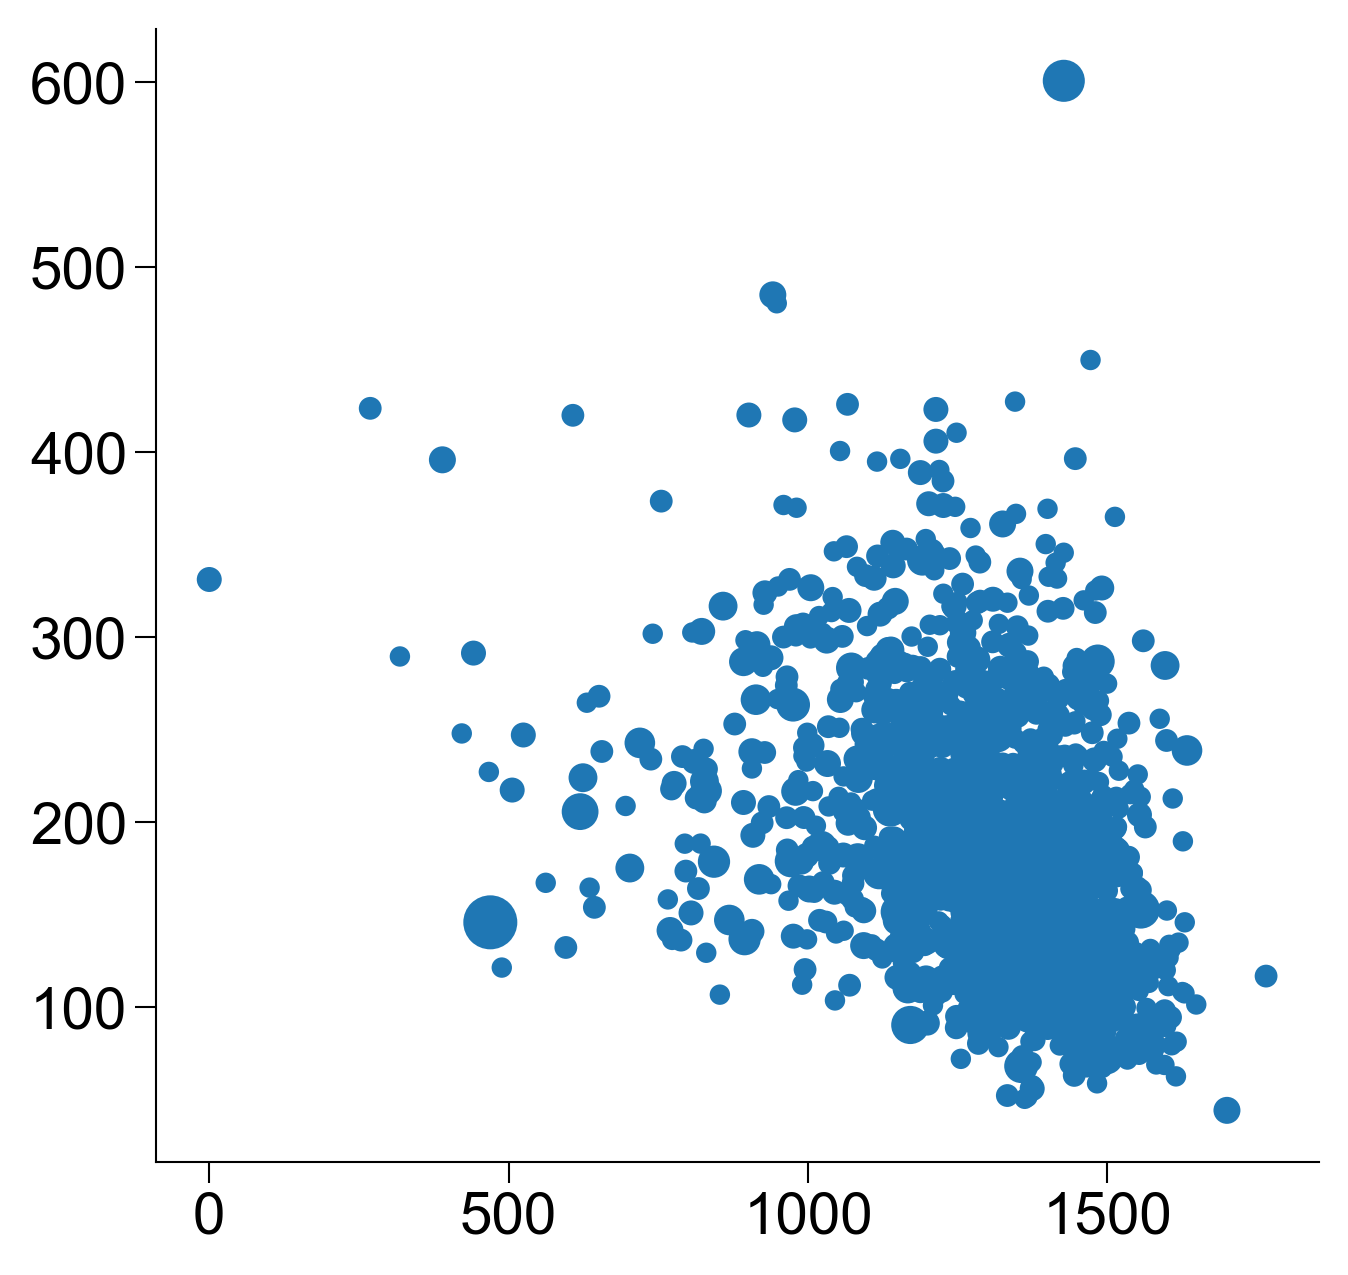

In [26]:
import matplotlib.pyplot as plt
import numpy as np


result_tcr = tcr_cluster_result.obs[
    np.array(tcr_cluster_result.obs['disease_type_1'] == 'Solid tumor') & 
    np.array(tcr_cluster_result.obs['count'] > 2) &
    np.array(tcr_cluster_result.obs['number_of_individuals'] > 3)
]


fig,ax = tdi.pl.createFig((5,5))
ax.scatter(
    result_tcr['tcr_similarity_score'],
    result_tcr['disease_specificity_score'],
    s=result_tcr['count'] * 6, 
    linewidths=0
)
plt.show()


<div class="alert alert-info">
<h2> Note </h2>
    
You should have `mafft` installed in your system to produce the logoplot below.

In **Ubuntu**, 

`sudo apt update`
`sudo apt install mafft`

In **MacOS**, please use HomeBrew

`brew install mafft`

    
In CentOS or other operating systems, please check In **CentOS**, please check https://mafft.cbrc.jp/alignment/software/linuxportable.html for manual installation.
    
    
</div>



Text(0.5, 1.0, 'CDR3b')

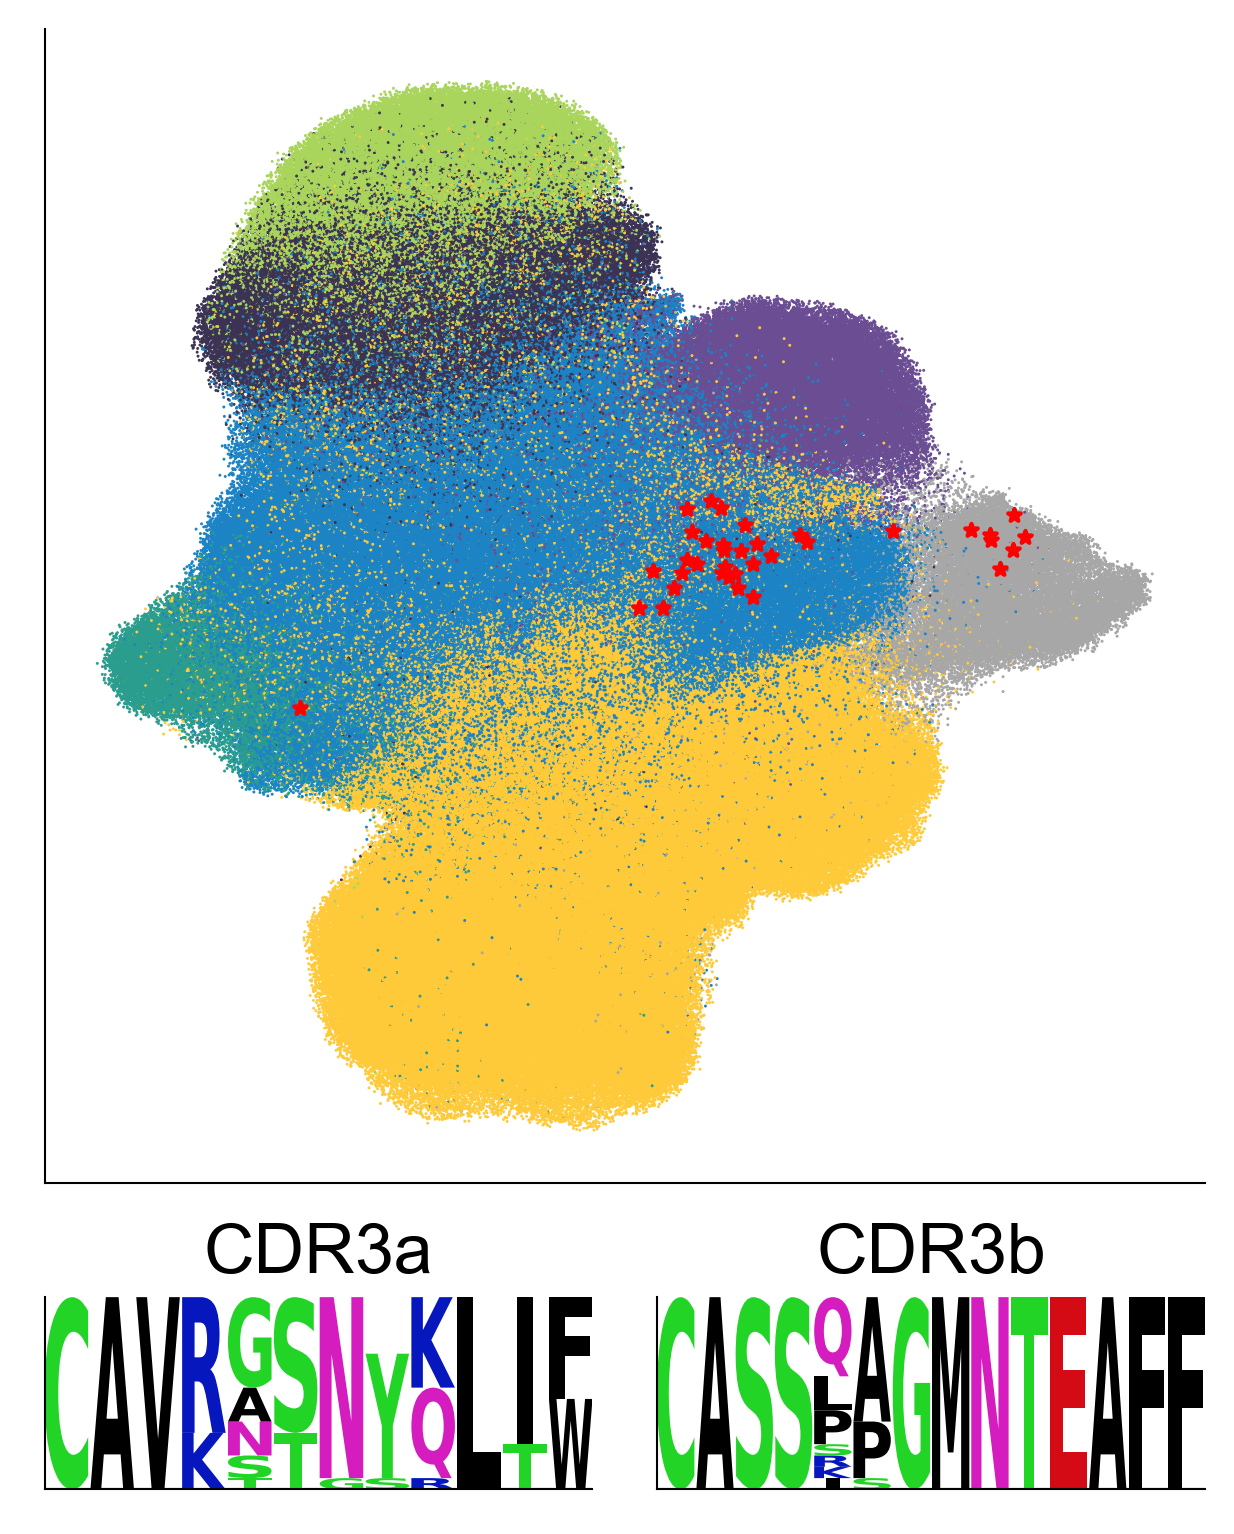

In [43]:
tcrs = list(filter(lambda x: x != '-', result_tcr.sort_values('disease_specificity_score', ascending=False).iloc[0,1:41])) 

tdi.pl.plot_gex_selected_tcrs(
    gex_reference_adata,
    tcrs,
    color='cell_type_1',
    palette=tdi.pl.palettes.reannotated_prediction_palette,
)

# Cluster TCRs in querying datasets from reference datasets

Once the single-cell immune profiling datasets are processed by CellRanger and the GEX and TCR information are integrated by Scanpy, and Scirpy, you would get a datasets including:
1) The raw gene expression matrix
2) The Full-length TCR sequence for each single-cell


And you would provide the sample name as well as the individual name to the dataset

We use an example datasets from Sun et al., 2022 of Gastric Cancer ([Sun, K. et al. (2022)](https://doi.org/10.1038/s41467-022-32627-z)). 




In [ ]:
gex_query_adata = tdi.read_h5ad("./tcr_deep_insight/data/GEX.GC.h5ad")

In [4]:
gex_query_adata.obs

,IR_VJ_1_junction_aa,IR_VDJ_1_junction_aa,IR_VJ_1_v_call,IR_VJ_1_j_call,IR_VDJ_1_v_call,IR_VDJ_1_j_call,sample_name,individual_name,reannotated_prediction_3
AAACCTGTCACAGTAC-Sun_2022-GC05P,CALSRYSGAGSYQLTF,CASSLPLANTIYF,TRAV16,TRAJ28,TRBV7-9,TRBJ1-3,GC05P,GC05,Treg
AAACCTGTCTTGCAAG-Sun_2022-GC05P,CAVISSDNARLMF,CSVGRDQKNIQYF,TRAV36DV7,TRAJ31,TRBV29-1,TRBJ2-4,GC05P,GC05,CD4
AAACGGGTCAGATAAG-Sun_2022-GC05P,CAVERDSGGSNYKLTF,CASSQRQGFNEQFF,TRAV22,TRAJ53,TRBV4-1,TRBJ2-1,GC05P,GC05,CD8
AAAGATGAGGTTACCT-Sun_2022-GC05P,CAATPGADKLIF,CASSRTGSLYGYTF,TRAV29DV5,TRAJ34,TRBV27,TRBJ1-2,GC05P,GC05,Treg
AAAGATGCAGGGTACA-Sun_2022-GC05P,CAGETSGSARQLTF,CASSFQSYGRDKF,TRAV12-3,TRAJ22,TRBV5-4,TRBJ1-2,GC05P,GC05,CD4
...,...,...,...,...,...,...,...,...,...
TTTGCGCGTTGGACCC-Sun_2022-GC04P,CAMTSVSSGTYKYIF,CASSLQDFNTGELFF,TRAV14DV4,TRAJ40,TRBV7-9,TRBJ2-2,GC04P,GC04,CD8
TTTGCGCTCGGCGCTA-Sun_2022-GC04P,CVVDTGRRALTF,CASSPGQGAYEQYF,TRAV12-1,TRAJ5,TRBV7-3,TRBJ2-7,GC04P,GC04,MAIT
TTTGGTTCACTGCCAG-Sun_2022-GC04P,CAVRTSKLTF,CSAWTSGSSYNEQFF,TRAV21,TRAJ44,TRBV20-1,TRBJ2-1,GC04P,GC04,CD4
TTTGGTTGTAAATACG-Sun_2022-GC04P,CAMTSVSSGTYKYIF,CASSLQDFNTGELFF,TRAV14DV4,TRAJ40,TRBV7-9,TRBJ2-2,GC04P,GC04,CD8


In [5]:
gex_query_adata.obs['individual'] = list(map(lambda x: x.split("-")[-1], gex_query_adata.obs.index))

In [6]:
tdi.pp.update_anndata(gex_query_adata)

Fri May  5 20:09:15 2023	TCRDeepInsight: initializing dataset
Fri May  5 20:09:15 2023	TCRDeepInsight: adding 'tcr' to adata.obs


We wrapped our TCR-DeepInsight model into few lines of Python code here

In [9]:
_ = tdi.tl.get_pretrained_gex_embedding(
    gex_query_adata,
    gex_reference_adata=gex_reference_adata,
    transfer_label='cell_type_1',
    checkpoint_path='./tcr_deep_insight/data/pretrained_weights/human_vae_gex_all_cd4_cd8_v1.ckpt',
    device='cuda:0'
)

Fri May  5 20:09:30 2023	Loading Reference adata...
Fri May  5 20:09:39 2023	Building VAE model...
Fri May  5 20:09:39 2023	Initializing dataset into memory
Fri May  5 20:09:39 2023	warning: the provided n_batch=0 does not match the number of batch in the adata.
Fri May  5 20:09:39 2023	setting n_batch to 437
Fri May  5 20:10:00 2023	Loading VAE model checkpoints...
Fri May  5 20:10:02 2023	Initializing dataset into memory
Fri May  5 20:10:02 2023	warning: the provided n_batch=437 does not match the number of batch in the adata.
Fri May  5 20:10:02 2023	setting n_batch to 461
Fri May  5 20:10:57 2023	Transfering cell type labels...


We get the joint representation of the reference GEX and the query new dataset GEX and project then to 2D using UMAP

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


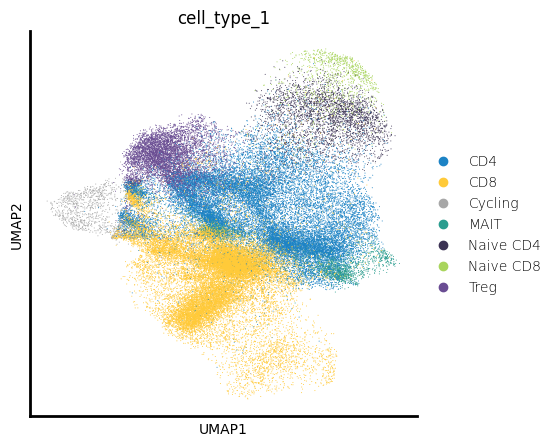

In [10]:
import matplotlib.pyplot as plt
fig,ax=tdi.pl.createFig((5,5))
tdi.pl.umap(gex_query_adata, color='cell_type_1', palette=tdi.pl.palette.reannotated_prediction_palette,ax=ax)

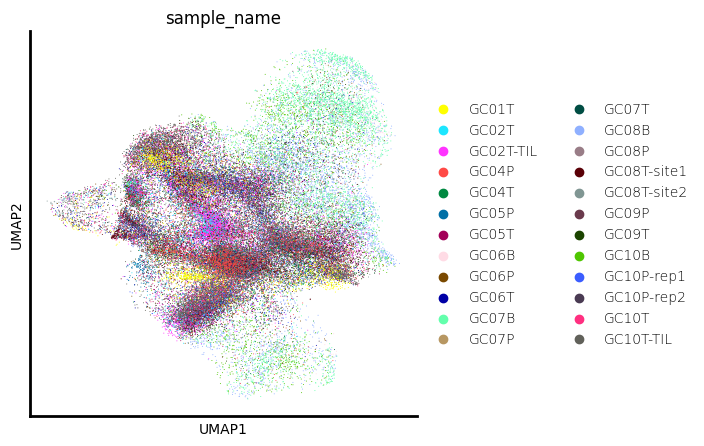

In [11]:
import matplotlib.pyplot as plt
ig,ax=tdi.pl.createFig((5,5))
tdi.pl.umap(gex_query_adata, color='sample_name', palette=tdi.pl.palettes.godsnot_102,ax=ax)


In [12]:
tcr_query_adata = tdi.pp.unique_tcr_by_individual(gex_query_adata, label_key='cell_type_1')

In [87]:
tcr_query_adata.obs['disease_type_2'] = 'Gastric Cancer'
tcr_reference_adata.obs['disease_type_2'] = 'Others'

In [69]:
tdi.tl.get_pretrained_tcr_embedding(
    tcr_adata=tcr_query_adata,
    bert_config=tdi.model.config.get_human_config(),
    checkpoint_path='./tcr_deep_insight/data/pretrained_weights/human_bert_tcr_768_v1.ckpt',
    pca_path='./tcr_deep_insight/data/pretrained_weights/human_bert_tcr_pca_v1.pkl',
    use_pca=True
)

Fri May  5 20:40:52 2023	Building BERT model
Fri May  5 20:40:53 2023	Loading BERT model checkpoints...
Fri May  5 20:40:53 2023	Computing TCR Embeddings...


100%|███████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:40<00:00,  4.55s/it]


In [88]:
tcr_cluster_result = tdi.tl.cluster_tcr_from_reference(
    tcr_query_adata,
    tcr_reference_adata,
    label_key='disease_type_2',
    gpu=1
)

WARNING clustering 671740 points to 671740 centroids: please provide at least 26197860 training points


Number of training points (671740) same as number of clusters, just copying
Fri May  5 21:27:19 2023	Iterative anchoring...


100%|███████████████████████████████████████████████████████████████████████████████████| 36347/36347 [00:10<00:00, 3563.76it/s]


Fri May  5 21:27:29 2023	Remove repetitive clusters...


100%|████████████████████████████████████████████████████████████████████████████████████| 8471/8471 [00:01<00:00, 7507.02it/s]


In [89]:
tdi.tl.inject_tcr_cluster(tcr_query_adata, tcr_cluster_result, 'cell_type_1')

In [5]:
import numpy as np
result_tcr = tcr_cluster_result.obs[
    np.array(tcr_cluster_result.obs['count'] > 3) & 
    np.array(tcr_cluster_result.obs['number_of_individuals'] > 1) & 
    np.array(tcr_cluster_result.obs['cell_type_1'] != 'MAIT')
]

In [6]:
gex_query_adata=tdi.read_h5ad("/Users/snow/Downloads/gex_query_adata.h5ad")


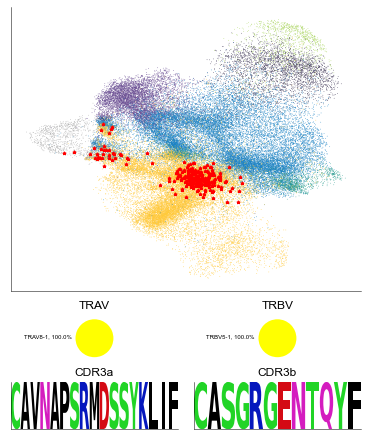

In [7]:
tcrs = list(filter(lambda x: x != '-', result_tcr.sort_values('tcr_similarity_score', ascending=False).iloc[0,1:41])) 

tdi.pl.plot_gex_tcr_selected_tcrs(
    gex_adata = gex_query_adata,
    color='cell_type',
    tcrs=tcrs,
    palette=tdi.pl.palette.reannotated_prediction_palette,
)